In [1]:
from pyspark.sql import SparkSession


In [2]:
spark = SparkSession.builder.appName("RDD Example").getOrCreate() # making a new spark session. # obj name: spark
data = [1, 2, 3, 4, 5]
rdd = spark.sparkContext.parallelize(data)  # for paralla computing use: parallelize
print(rdd.collect())  # Output: [1, 2, 3, 4, 5]


[1, 2, 3, 4, 5]


Let a textfile has:
Hello world. Apache Spark is powerful.
Resilient Distributed Dataset.

In [5]:
rdd = spark.sparkContext.textFile("/content/RDD.txt")
print(rdd.collect())


['Hello world. Apache Spark is powerful.', 'Resilient Distributed Dataset.']


#Transformations

map: প্রতিটি উপাদানের উপর একটি ফাংশন প্রয়োগ করে।

In [13]:
rdd = spark.sparkContext.parallelize([1, 2, 3]) # parallelize convert a list to RDD
mapped_rdd = rdd.map(lambda x: x * 2)
print(mapped_rdd.collect())  # Output: [2, 4, 6]

# lambda: Single-line anonymous function.
# def funtion(): Multi-line named function.



[2, 4, 6]


In [14]:
def function(x):
  return x*x

rdd = spark.sparkContext.parallelize([1, 2, 3,4,5,6,7,8,9]) # parallelize convert a list to RDD
mapped_rdd = rdd.map(function)
print(mapped_rdd.collect())  # Output: [2, 4, 6]

# instade of Lambda we can use a simple function.
# def funtion(): Multi-line named function.



[1, 4, 9, 16, 25, 36, 49, 64, 81]


filter: নির্দিষ্ট শর্ত পূরণকারী উপাদানগুলো বাছাই করে।
Like: if condition.

In [15]:
filtered_rdd = rdd.filter(lambda x: x % 2 == 0)
print(filtered_rdd.collect())


[2, 4, 6, 8]


In [16]:
pm= rdd.filter(lambda p: p>5)
pm.collect()

[6, 7, 8, 9]

flatMap: উপাদানগুলিকে ফ্ল্যাট করে অনেকগুলোতে বিভক্ত করে।

In [23]:
lines = ["hello world", "how are you"]
rdd = spark.sparkContext.parallelize(lines)
words = rdd.flatMap(lambda line: line.split(" "))
print(words.collect())  # Output: ['hello', 'world', 'how', 'are', 'you']


['hello', 'world', 'how', 'are', 'you']


In [25]:
rdd = spark.sparkContext.textFile("/content/RDD.txt")
words = rdd.flatMap(lambda line: line.split(" "))
print(words.collect())  # Output: ['hello', 'world', 'how', 'are', 'you']


['Hello', 'world.', 'Apache', 'Spark', 'is', 'powerful.', 'Resilient', 'Distributed', 'Dataset.']


distinct: ডুপ্লিকেট উপাদান সরিয়ে ফেলে।
**bold text**

In [26]:
rdd = spark.sparkContext.parallelize([1, 2, 2, 3, 3])
print(rdd.distinct().collect())  # Output: [1, 2, 3]


[2, 1, 3]


In [29]:
lines = ["hello world hello", "how are u u ?"]
rdd = spark.sparkContext.parallelize(lines)
print(rdd.distinct().collect())

# it not work. so distinct() only for number.......!

['how are u u ?', 'hello world hello']


#Actions

collect: সমস্ত উপাদান রিটার্ন করে।

In [31]:
list= [1,2,3,4,5,6,7,8,9,10]
rdd= spark.sparkContext.parallelize(list)
rdd.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

count: উপাদানের সংখ্যা রিটার্ন করে।
it take more time to arethmatic operation: count is havy for rdd

In [34]:
rdd.count()

10

In [36]:
print(rdd.take(2)) # like head

[1, 2]


reduce: একটি ফাংশন ব্যবহার করে উপাদানগুলো একত্র করে।

![image.png]()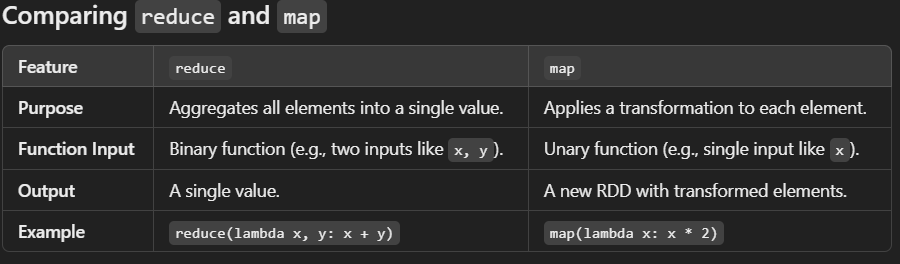

In [40]:
result = rdd.reduce(lambda x, y: x + y)
print(result)


55


# RDD Persistence


In [41]:
from pyspark import StorageLevel
rdd.persist(StorageLevel.MEMORY_AND_DISK)


ParallelCollectionRDD[65] at readRDDFromFile at PythonRDD.scala:289

#RDD Partitioning


In [43]:
rdd = spark.sparkContext.parallelize(data, numSlices=4)
print(rdd.getNumPartitions())  # Output: 4


4


#Fault Tolerance with Lineage


যদি কোনো নোড কাজ করা বন্ধ করে দেয়, Spark লিনিয়েজ (lineage) ব্যবহার করে হারানো ডেটা পুনর্গঠন করে।

In [44]:
rdd1 = spark.sparkContext.parallelize([1, 2, 3])
rdd2 = rdd1.map(lambda x: x * 2)
print(rdd2.toDebugString())


b'(2) PythonRDD[76] at RDD at PythonRDD.scala:53 []\n |  ParallelCollectionRDD[75] at readRDDFromFile at PythonRDD.scala:289 []'


# উদাহরণ: RDD দিয়ে Word Count



In [49]:
rdd = spark.sparkContext.textFile("/content/RDD.txt")
words = rdd.flatMap(lambda line: line.split(" "))
word_counts = words.map(lambda word: (word, 1)).reduceByKey(lambda x, y: x + y)
print(word_counts.collect())


[('Hello', 1), ('Apache', 1), ('Spark', 1), ('is', 2), ('powerful.', 1), ('Distributed', 1), ('loves', 1), ('interested', 1), ('in', 1), ('world.', 1), ('Resilient', 1), ('Dataset.', 1), ('prinom', 2), ('CSE.', 2)]


In [48]:
rdd = spark.sparkContext.parallelize("Myself: PRINOM. PRINOM is not good in English. prinom")
words = rdd.flatMap(lambda line: line.split(" "))
word_counts = words.map(lambda word: (word, 1)).reduceByKey(lambda x, y: x + y)
print(word_counts.collect())


[('y', 1), ('s', 3), ('l', 2), ('', 16), ('R', 2), ('N', 2), ('O', 2), ('.', 2), ('i', 4), ('g', 2), ('d', 1), ('h', 1), ('p', 1), ('r', 1), ('M', 3), ('e', 1), ('f', 1), (':', 1), ('P', 2), ('I', 2), ('n', 4), ('o', 4), ('t', 1), ('E', 1), ('m', 1)]
